In [0]:
from google.colab import drive
drive.mount("/content/drive")

In [0]:
import tensorflow as tf 
tf.test.gpu_device_name() 

In [4]:
import os
import string
from matplotlib import pyplot as plt
from math import floor
import seaborn as sns
import pandas as pd
import numpy as np
import random
from scipy import ndarray      # n-dimensional Array
import skimage as sk           # used for image Processing
from skimage import transform
from skimage import util
import warnings
import keras
warnings.filterwarnings('ignore')  # remove the warnings
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from keras.regularizers import l2 # for model
from keras.layers import Input,Conv2D,Dense, Dropout, BatchNormalization, MaxPooling2D, Activation, Flatten, AvgPool2D,InputLayer,GlobalAveragePooling2D,LSTM,Embedding
from keras.layers import  BatchNormalization as btn
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Model, Sequential
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras.callbacks import LearningRateScheduler,EarlyStopping   
from IPython.display import HTML
import base64
from keras.optimizers import RMSprop
from imblearn.over_sampling import SMOTE
from scipy.ndimage.interpolation import shift
from keras.optimizers import Adam
from keras.datasets import cifar10
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler
import cv2 as cv
import keras.utils as kp
import math
import librosa as lb
import IPython.display as ipd

%matplotlib inline

Using TensorFlow backend.


In [5]:
%cd /content/drive/My\ Drive/Urban Sound 8K/

/content/drive/My Drive/Urban Sound 8K


In [0]:
df = pd.read_csv('metadata/UrbanSound8K.csv')

In [7]:
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [0]:
melspect_data = np.load('melspectogram_dataset.npy',allow_pickle=True)

In [9]:
print(melspect_data.shape)                  # shape of the mfcc data
print(type(melspect_data))

(8732, 2)
<class 'numpy.ndarray'>


In [0]:
melspect =   pd.DataFrame(melspect_data,columns=['Data_array','Class_id'])

In [11]:
melspect.head()

,Data_array,Class_id
0,"[2.6979757e-05, 0.00022196754, 0.00029985275, ...",3
1,"[0.04970262, 0.04953003, 0.037173897, 0.028717...",2
2,"[0.03085089, 0.02802173, 0.03644557, 0.0259697...",2
3,"[0.026512928, 0.032828856, 0.045829367, 0.0329...",2
4,"[0.061544705, 0.040471293, 0.02315449, 0.01584...",2


In [12]:
print(melspect.shape)

(8732, 2)


In [13]:
y = melspect['Class_id']

'''
0 = air_conditioner
1 = car_horn
2 = children_playing
3 = dog_bark
4 = drilling
5 = engine_idling
6 = gun_shot
7 = jackhammer
8 = siren
9 = street_music
'''

'\n0 = air_conditioner\n1 = car_horn\n2 = children_playing\n3 = dog_bark\n4 = drilling\n5 = engine_idling\n6 = gun_shot\n7 = jackhammer\n8 = siren\n9 = street_music\n'

In [0]:
y_hot_encode = pd.get_dummies(y) 

In [15]:
print(y_hot_encode.shape)

(8732, 10)


In [0]:
melspect.drop(['Class_id'],inplace=True,axis=1)

In [17]:
melspect_data1 = np.array(melspect['Data_array'].tolist())
print(melspect_data1.shape)

(8732, 128)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(melspect_data1,y_hot_encode,test_size=838,random_state=None)

In [19]:
print('X_train shape',X_train.shape)
print('y_train shape',y_train.shape)
print('X_test shape',X_test.shape)
print('y_test shape',y_test.shape)

X_train shape (7894, 128)
y_train shape (7894, 10)
X_test shape (838, 128)
y_test shape (838, 10)


In [0]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

#**Model**

In [0]:
model = Sequential()

model.add(Dense(256,activation="relu",kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01),input_shape=(128,)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(512,activation="relu",kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(512,activation="relu",kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.45))

model.add(Dense(1024,activation="relu",kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.50))

model.add(Dense(512,activation="relu",kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.50))

model.add(Dense(256,activation="relu",kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.45))

model.add(Dense(256,activation="relu",kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.45))

model.add(Dense(10,activation="softmax"))



model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 256)               33024     
_________________________________________________________________
batch_normalization_74 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_74 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 512)               131584    
_________________________________________________________________
batch_normalization_75 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_75 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 512)             

In [0]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

In [0]:
history = model.fit(X_train_std,y_train,batch_size=64,epochs=32,callbacks=[annealer],validation_data=(X_test_std,y_test))

Train on 7894 samples, validate on 838 samples
Epoch 1/32
7894/7894 [==============================] - 11s 1ms/step - loss: 30.0889 - acc: 0.1483 - val_loss: 26.1536 - val_acc: 0.2757
Epoch 2/32
7894/7894 [==============================] - 2s 253us/step - loss: 23.4153 - acc: 0.2217 - val_loss: 19.9737 - val_acc: 0.2255
Epoch 3/32
7894/7894 [==============================] - 2s 241us/step - loss: 17.3634 - acc: 0.2754 - val_loss: 14.7298 - val_acc: 0.2363
Epoch 4/32
7894/7894 [==============================] - 2s 244us/step - loss: 12.6897 - acc: 0.3168 - val_loss: 10.8559 - val_acc: 0.2971
Epoch 5/32
7894/7894 [==============================] - 2s 249us/step - loss: 9.3084 - acc: 0.3504 - val_loss: 8.1341 - val_acc: 0.3031
Epoch 6/32
7894/7894 [==============================] - 2s 252us/step - loss: 7.0245 - acc: 0.3835 - val_loss: 6.3132 - val_acc: 0.3389
Epoch 7/32
7894/7894 [==============================] - 2s 247us/step - loss: 5.4884 - acc: 0.4070 - val_loss: 4.9973 - val_acc: 0

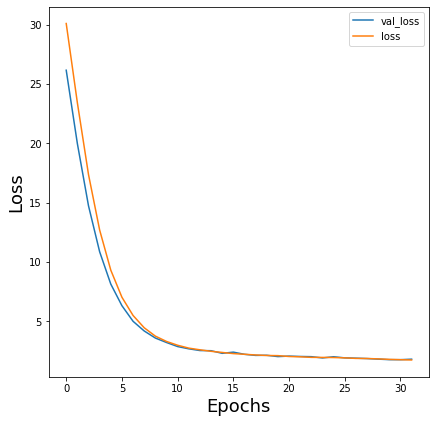

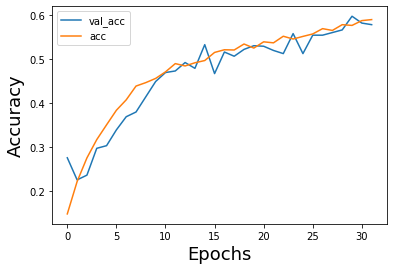

In [0]:
name_title = ['Loss','Accuracy']
# for net in range(nets):
fig=plt.figure(figsize=(64,64))
for i in range(0,2):
    ax=fig.add_subplot(8,8,i+1)
    plt.plot(history.history[list(history.history.keys())[i]], label = list(history.history.keys())[i] )
    plt.plot(history.history[list(history.history.keys())[i+2]],label = list(history.history.keys())[i+2] )
    plt.xlabel('Epochs', fontsize=18)
    plt.ylabel(name_title[i], fontsize=18)
    plt.legend()
    plt.show()

In [0]:
model.save('model_spectogram.h5')

#**LSTM MODEL**

In [21]:
X_train_std_3 = X_train_std[:,:,np.newaxis]
X_test_std_3 = X_test_std[:,:,np.newaxis]

print("X_train_std_3:  ",X_train_std_3.shape)
print("X_test_std_3:  ",X_test_std_3.shape)

X_train_std_3:   (7894, 128, 1)
X_test_std_3:   (838, 128, 1)


In [0]:
model2 = Sequential()

model2.add(LSTM(100,activation="tanh",kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01),return_sequences=True,input_shape=(128,1)))
model2.add(BatchNormalization())
model2.add(Dropout(0.35))

model2.add(LSTM(100,activation='tanh',kernel_regularizer=l2(0.01),return_sequences=True,bias_regularizer=l2(0.01)))
model2.add(BatchNormalization())
model2.add(Dropout(0.35))

model2.add(LSTM(100,activation='tanh',kernel_regularizer=l2(0.01),return_sequences=True,bias_regularizer=l2(0.01)))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))

model2.add(LSTM(100,activation='tanh',kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))


model2.add(Dense(10,activation="softmax"))


model2.compile(optimizer='rmsProp',loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 128, 100)          40800     
_________________________________________________________________
batch_normalization_11 (Batc (None, 128, 100)          400       
_________________________________________________________________
dropout_11 (Dropout)         (None, 128, 100)          0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 128, 100)          80400     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128, 100)          400       
_________________________________________________________________
dropout_12 (Dropout)         (None, 128, 100)          0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 128, 100)         

In [35]:
history2 = model2.fit(X_train_std_3,y_train,batch_size=64,epochs=20,validation_data=(X_test_std_3,y_test))

Train on 7894 samples, validate on 838 samples
Epoch 1/20
7894/7894 [==============================] - 104s 13ms/step - loss: 9.3836 - acc: 0.1819 - val_loss: 8.1511 - val_acc: 0.1862
Epoch 2/20
7894/7894 [==============================] - 99s 13ms/step - loss: 6.3543 - acc: 0.1993 - val_loss: 5.5214 - val_acc: 0.1897
Epoch 3/20
7894/7894 [==============================] - 100s 13ms/step - loss: 4.7917 - acc: 0.2129 - val_loss: 4.8239 - val_acc: 0.1134
Epoch 4/20
7894/7894 [==============================] - 99s 12ms/step - loss: 3.8078 - acc: 0.2323 - val_loss: 3.7494 - val_acc: 0.1718
Epoch 5/20
7894/7894 [==============================] - 98s 12ms/step - loss: 3.1362 - acc: 0.2459 - val_loss: 3.6937 - val_acc: 0.1396
Epoch 6/20
7894/7894 [==============================] - 98s 12ms/step - loss: 2.6432 - acc: 0.2563 - val_loss: 2.5614 - val_acc: 0.2351
Epoch 7/20
7894/7894 [==============================] - 98s 12ms/step - loss: 2.3070 - acc: 0.2839 - val_loss: 3.1121 - val_acc: 0.1945

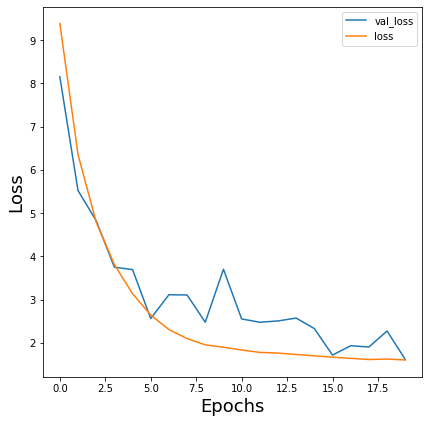

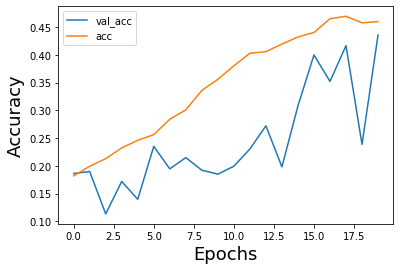

In [36]:
name_title = ['Loss','Accuracy']
# for net in range(nets):
fig=plt.figure(figsize=(64,64))
for i in range(0,2):
    ax=fig.add_subplot(8,8,i+1)
    plt.plot(history2.history[list(history2.history.keys())[i]], label = list(history2.history.keys())[i] )
    plt.plot(history2.history[list(history2.history.keys())[i+2]],label = list(history2.history.keys())[i+2] )
    plt.xlabel('Epochs', fontsize=18)
    plt.ylabel(name_title[i], fontsize=18)
    plt.legend()
    plt.show()

#**Testing**

In [38]:
ipd.Audio(filename='Ambulance-SoundBible.com-1013640058.wav')

In [0]:
data,sr = lb.load('Ambulance-SoundBible.com-1013640058.wav',sr=22050,res_type='kaiser_fast')

In [0]:
melspect_test = lb.feature.melspectrogram(y=data,sr=sr)                   
melspect_test = np.mean(melspect_test.T,axis=0)

In [41]:
melspect_test.shape

(128,)

In [0]:
melspect_test = np.array(melspect_test.tolist())
melspect_test_std = std.fit_transform(melspect_test.reshape(-1,1))

In [43]:
print(melspect_test_std.shape)

(128, 1)


In [0]:
melspect_test_std = np.squeeze(melspect_test_std)

In [0]:
op = np.expand_dims(melspect_test_std,axis=0)

In [46]:
op.shape

(1, 128)

In [0]:
prediction = model.predict_proba(op)
output = np.argmax(prediction,axis=1)

In [0]:
print(output)                                           # From melspectogram model we get wrong prediction.

[3]


In [0]:
# LSTM model prediction

In [0]:
op_3 = op[:,:,np.newaxis]

In [0]:
prediction2 = model2.predict_proba(op_3)
output2 = np.argmax(prediction2,axis=1)

In [49]:
print(output2)                      # It predicts the correct answer

[8]
